In [9]:
import pandas as pd
import numpy as np
import glob
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import math

In [3]:
def sMAPE(a, b):
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [4]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [6]:
def arima_loop(dataset):

    # split into train and test sets
    print('Separating into train and test')
    train = dataset.iloc[:32160]
    test = dataset.iloc[32160:]
    y_test = test['energy(kWh/hh)'].to_list()
    
    # Create Model
    print('Creating model')
    arima_model = ARIMA(train,order = (2,0,9)).fit()

    #Predict and save results
    print('Prediciting and saving results')
    ARIMA_prediction = arima_model.predict(start=32160, end =35087,typ= 'levels')
    y_pred = ARIMA_prediction.to_list()
    
    #Metrics
    print('Calculating metrics')
    mape_i = sMAPE(y_test,y_pred)
    rmsle_i = rmsle(y_test,y_pred)
    
    return mape_i, rmsle_i

In [10]:
# load the dataset
path = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/"
all_files = glob.glob(path + "/*.csv")

i = 0
mape_t = []
rmsle_t = []
for filename in all_files:
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True) 
    mape_i,rmsle_i = arima_loop(df)
    mape_t.append(mape_i)
    rmsle_t.append(rmsle_i)
    i = i + 1
    print('filename number ' + str(i))

Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 1
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 2
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 3


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


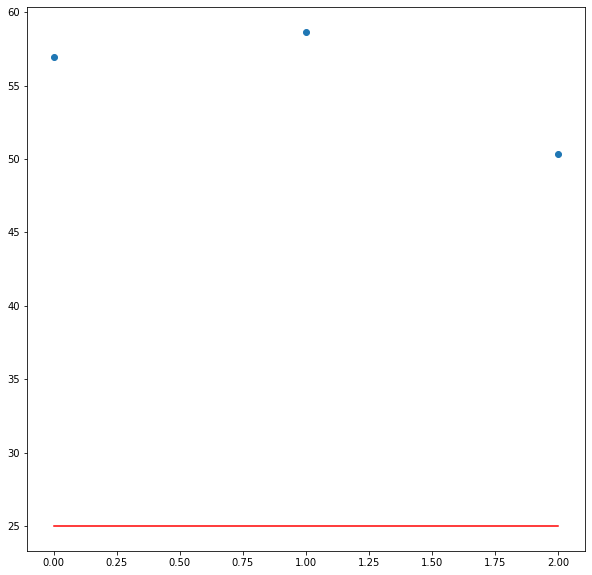

In [12]:
plt.figure(figsize = (10,10))
plt.scatter(range(3),mape_t)
plt.plot(range(3),[25]*3,color = 'red')
plt.show()

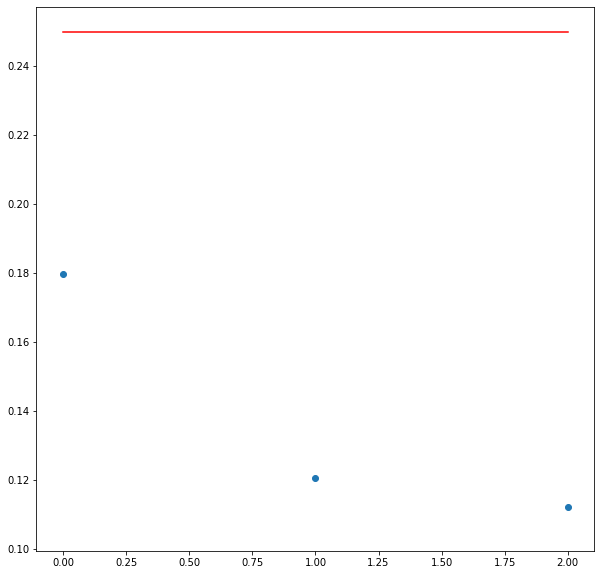

In [13]:
plt.figure(figsize = (10,10))
plt.scatter(range(3),rmsle_t)
plt.plot(range(3),[0.25]*3,color = 'red')
plt.show()